In [ ]:
#Data manipilation libraries
import pandas as pd
import numpy as np
import sklearn

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#cce6ff","figure.facecolor":"#cce6ff"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
#import the dataset
dataset = pd.read_csv( '/content/HR Employee Attrition Dataset.csv' )


In [ ]:
#print first 10 rows
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


**SUMMARY STATISTICS**

In [ ]:
#check shape of the dataset
dataset.shape

(1470, 35)

In [ ]:
#check the data types
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#summary statistics for numerical variables
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**INSIGHTS**


1.   All employees are adults over the age of 18, evidenced through the minimum age of the **Age** attribute
2.   Standard deviation for **EmployeeCount** and **StandardHours** is 0.0, implying that the values for these attributes are the same.
3.   **EmployeeNumber** is unique to each employee.
4.   Therefore we conclude that the above attributes do not have any meaningful impact on our analysis so we move to drop them.



In [ ]:
#drop columns that do not provide meaningful insights
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
dataset.drop(columns=cols, inplace=True)

In [ ]:
#summary statistics for categorical variables
cat_cols=dataset.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(dataset[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(dataset.select_dtypes(include=object).describe())

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [ ]:
display(cat_df)

count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
OverTime       Yes                          416
               No                          1054

**INSIGHTS**


1.   Attrition is highly biased towards the No category
2.   BusinessTravel is highly biased towards the Travel_Rarely category



In [ ]:
#check for duplicates
print("Duplicates in Dataset: ",dataset.duplicated().sum())

Duplicates in Dataset:  0


In [ ]:
#check and calculate missing values
missing_values = dataset.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_values["% of Missing Values"] = round((missing_values["Total No. of Missing Values"]/len(dataset))*100,2)
missing_values

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EnvironmentSatisfaction,0,0.0
Gender,0,0.0


In [ ]:
#check the values of categorical variables
categorical_cols = dataset.select_dtypes(include="O").columns

for column in categorical_cols:
    print('Unique values of ', column, set(dataset[column]))
    print("-"*140)

Unique values of  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Human Resources', 'Other', 'Medical', 'Marketing', 'Life Sciences', 'Technical Degree'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Female', 'Male'}
---------------------------------------------------------

**EXPLORATORY DATA ANALYSIS**

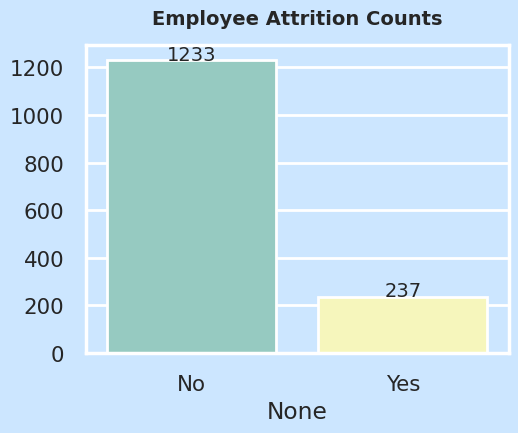

In [ ]:
#employee attrition count visualization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
attrition_rate = dataset["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set3')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)
plt.show()


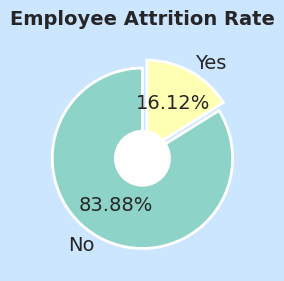

In [ ]:
#employee attrition percentage visualization
plt.subplot(1,2,2)
colors = sns.color_palette('Set3', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

1.   The dataset has an Attrition Rate of **16.12%**
2.   There is imbalance within the dataset



In [ ]:
#Function to visualize attrition rate by different variables
def graphs_plot_bar_pie(df, col, hue):
    plt.figure(figsize=(12, 4))

    # Extract value counts for the specified column
    value_counts = dataset[col].value_counts().sort_index()

    # First visual: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Dataset distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set3', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

      # Second visual: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set3')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

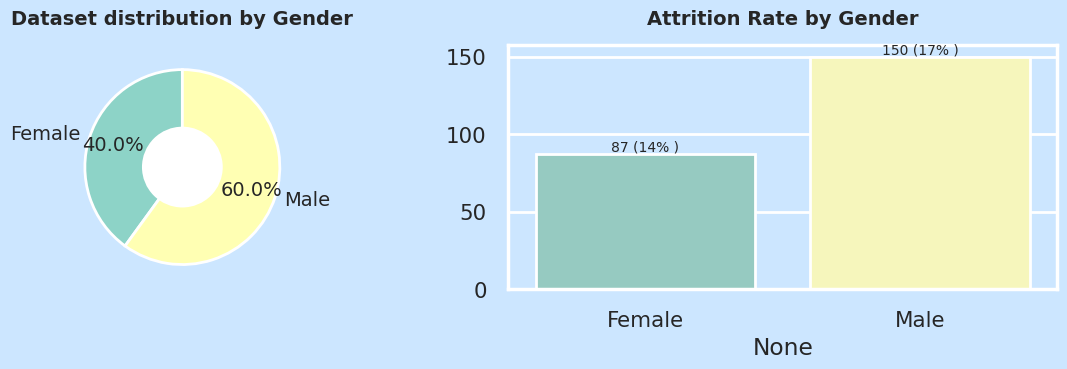

In [ ]:
#Attrition by Gender
graphs_plot_bar_pie(dataset, 'Gender', 'Attrition')



1.   Male population accounts for a larger propotion with 60% while female population is 40%
2.   Males seem to have reasons for leaving than females with a larger attrition rate of 17% compared with 14% for females.



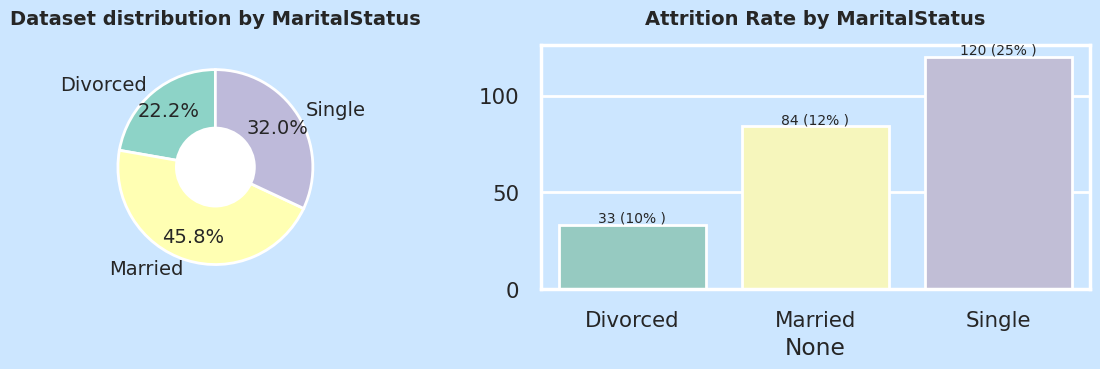

In [ ]:
#Attrition by Marital Status
graphs_plot_bar_pie(dataset, 'MaritalStatus', 'Attrition')



1.   There is a large propotion of married people with 45.8% followed by Single with 32% and Divorced people with 22.2%
2.   Single population has a larger attrition rate of 25% compared to both married and divorced with 12% and 10% respectively



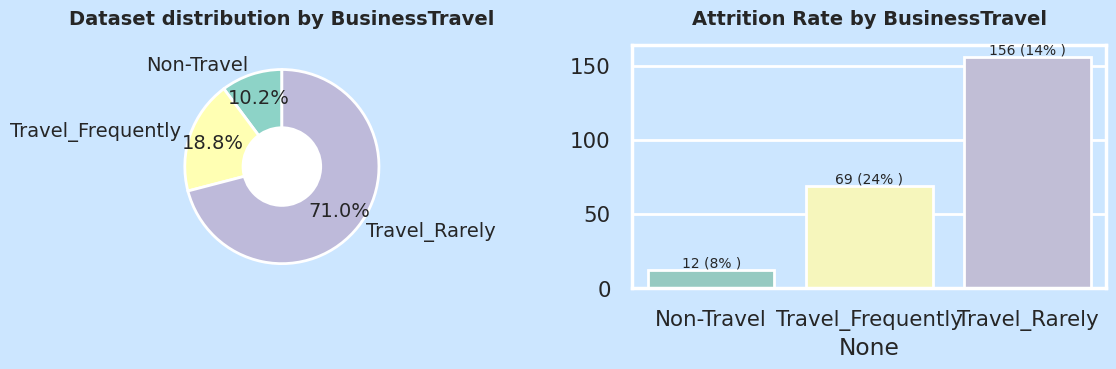

In [ ]:
#Attrition by Business Travel
graphs_plot_bar_pie(dataset, 'BusinessTravel', 'Attrition')



1.   71% of the population travels rarely, followed by those who travel frequently with 18.8% and lastly those who dont travel with 10.2%
2.   Those who travel frequently have a high attrition rate of about 24% and non travellers and rare travels follw up with 14% and 8% attrition rates.



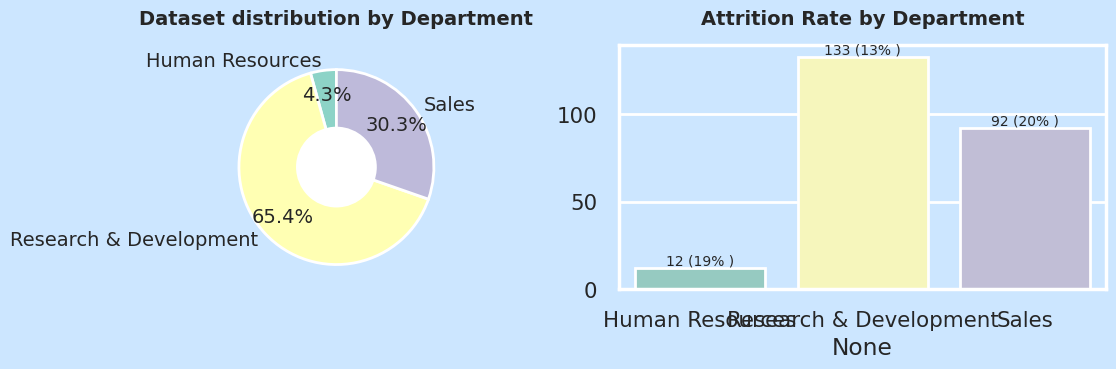

In [ ]:
#Attrition by Department
graphs_plot_bar_pie(dataset, 'Department', 'Attrition')



1.   The research and development department constitutes a large portion of the population with 65.4% followed by sales with 30.3% and HR with 4.3%
2.   Sales has a 20% attrition rate followed by HR with 19% and lastly R&D with 13%



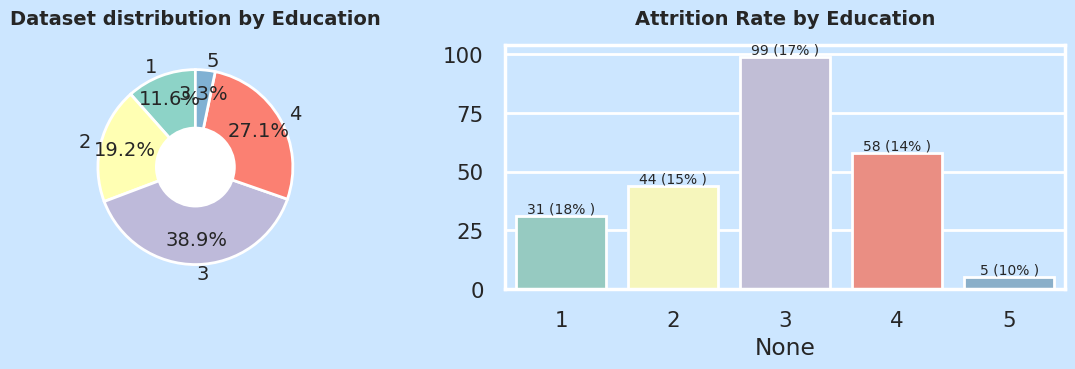

In [ ]:
#Attrition by Education
graphs_plot_bar_pie(dataset, 'Education', 'Attrition')



1.   Most of the employee population have acquired either a Bachelor degree or Masters Degree
2.   Employees with education less than a college degree have a higher attrition rate compared to ther educational levels.



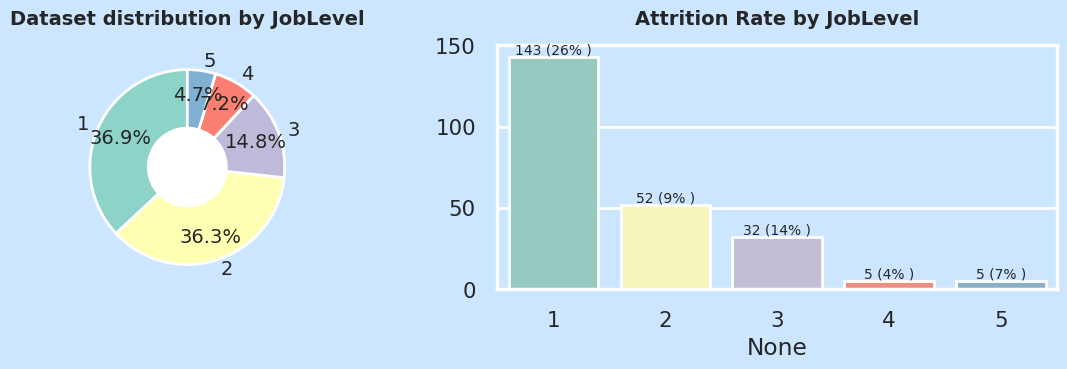

In [ ]:
#Attrition by JobLevel
graphs_plot_bar_pie(dataset, 'JobLevel', 'Attrition')

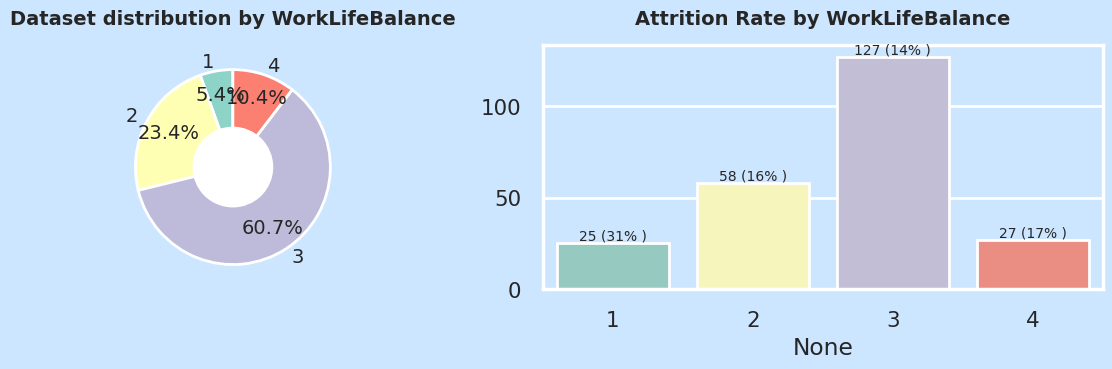

In [ ]:
#Attrition by WorkLifeBalance
graphs_plot_bar_pie(dataset, 'WorkLifeBalance', 'Attrition')

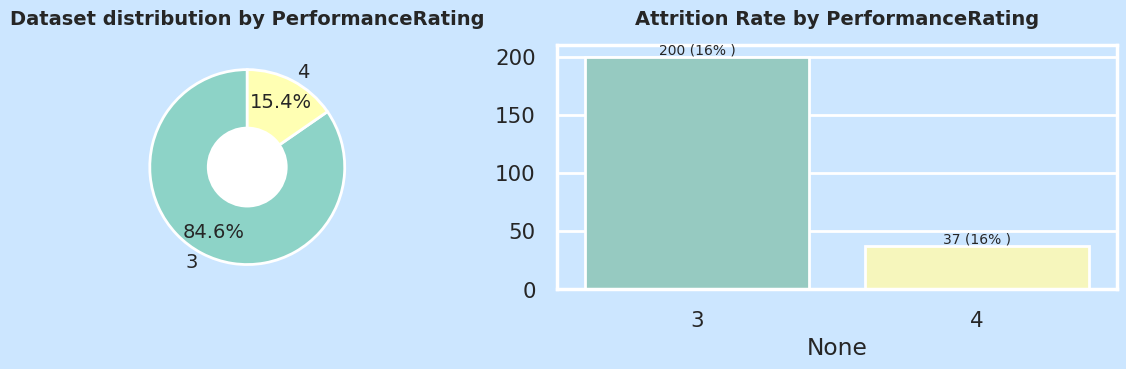

In [ ]:
#Attrition by PerformanceRating
graphs_plot_bar_pie(dataset, 'PerformanceRating', 'Attrition')

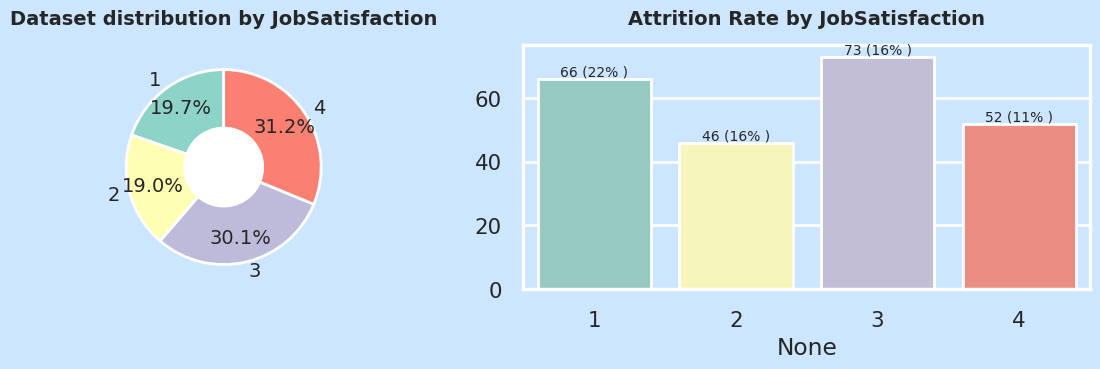

In [ ]:
#Attrition by JobSatisfaction
graphs_plot_bar_pie(dataset, 'JobSatisfaction', 'Attrition')

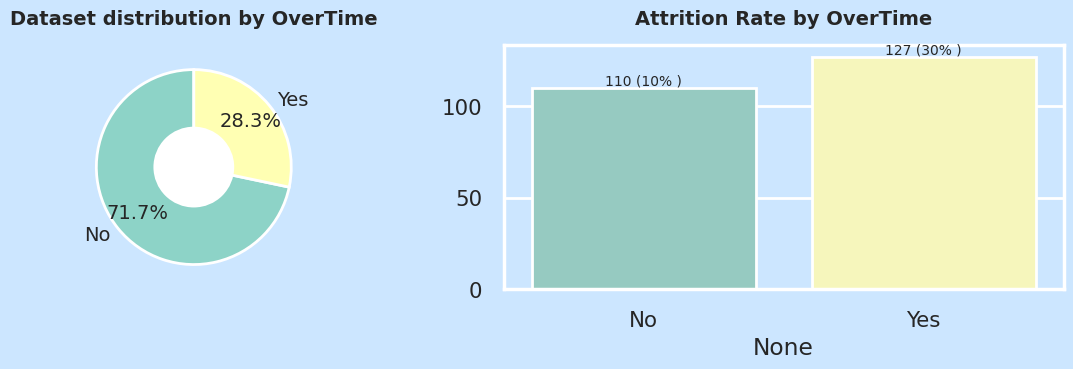

In [ ]:
#Attrition by OverTime
graphs_plot_bar_pie(dataset, 'OverTime', 'Attrition')

In [ ]:
def hist_plot_var(df, col, hue):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set1')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set1')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

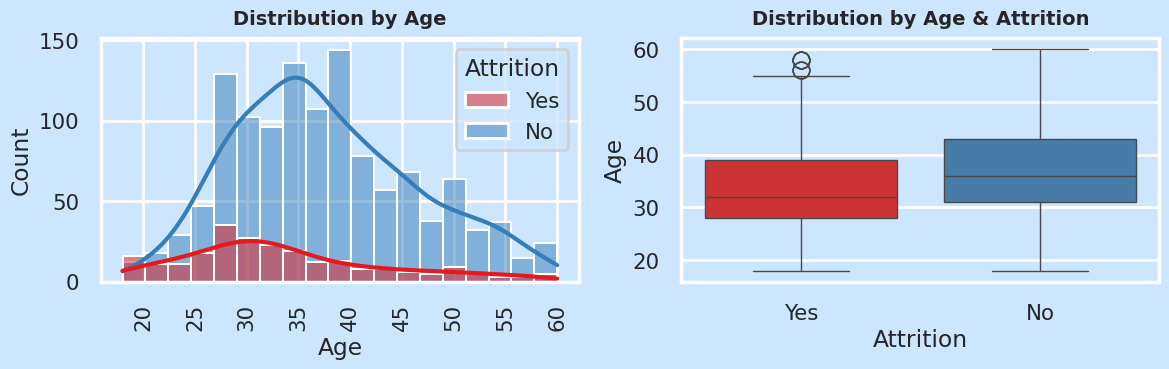

In [ ]:
#Distribution and Attrition by Age
hist_plot_var(dataset, 'Age', 'Attrition')

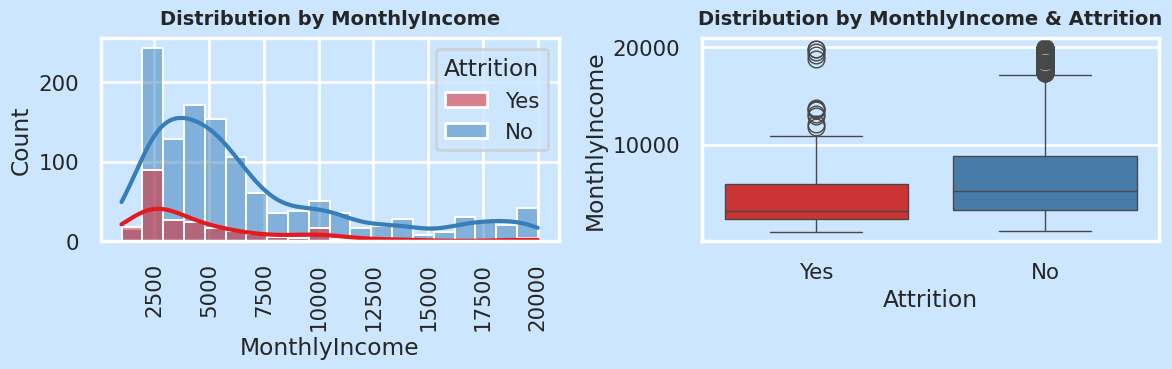

In [ ]:
#Distribution and Attrition by MonthlyIncome
hist_plot_var(dataset, 'MonthlyIncome', 'Attrition')

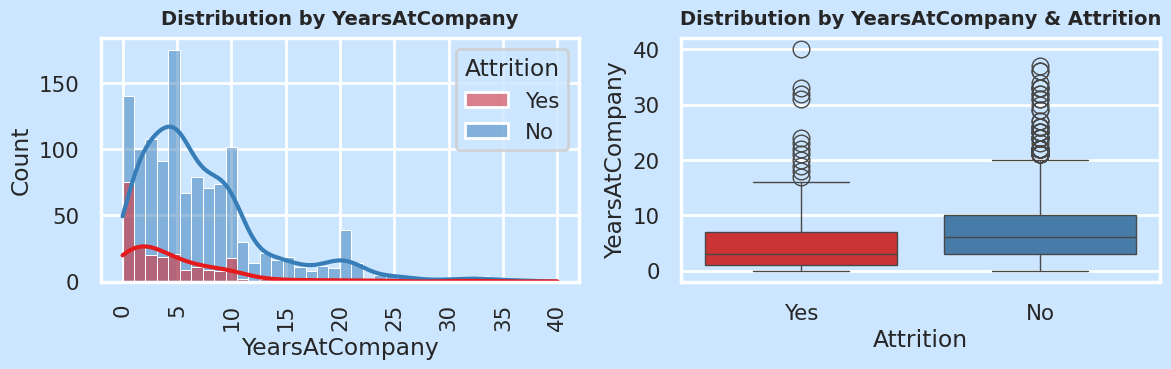

In [ ]:
#Distribution and Attrition by YearsAtCompany
hist_plot_var(dataset, 'YearsAtCompany', 'Attrition')

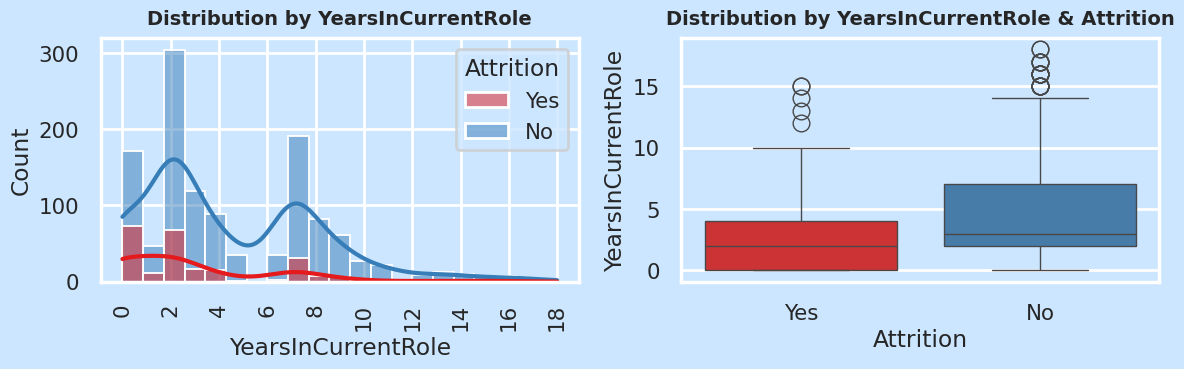

In [ ]:
#Distribution and Attrition by YearsInCurrentRole
hist_plot_var(dataset, 'YearsInCurrentRole', 'Attrition')

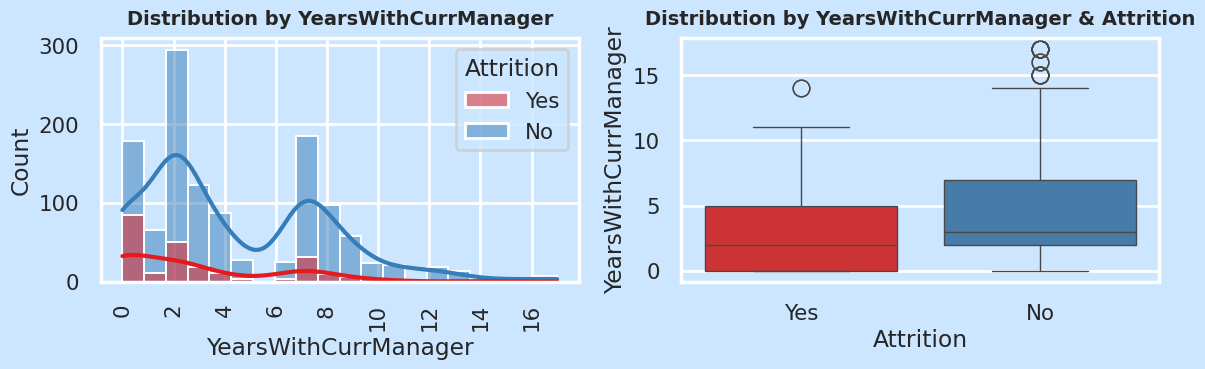

In [ ]:
#Distribution and Attrition by YearsWithCurrentManager
hist_plot_var(dataset, 'YearsWithCurrManager', 'Attrition')

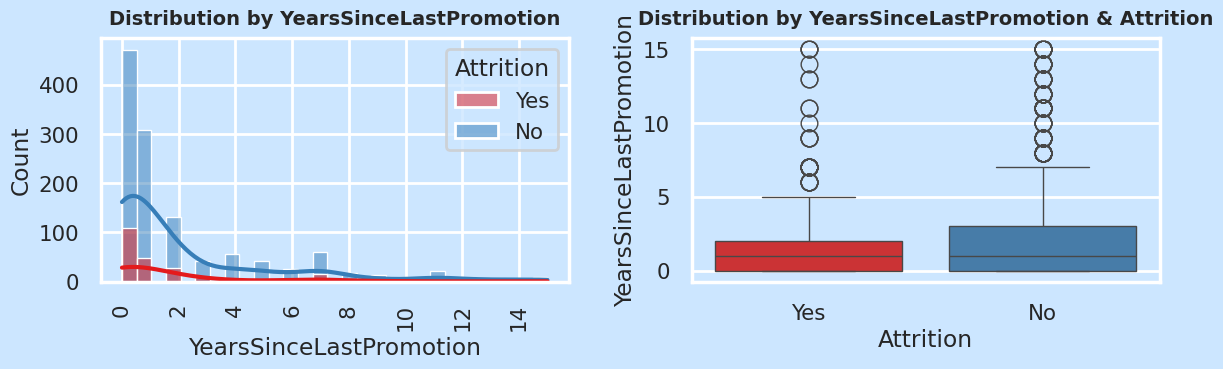

In [ ]:
#Distribution and Attrition by YearsSinceLastPromotion
hist_plot_var(dataset, 'YearsSinceLastPromotion', 'Attrition')

In [ ]:
#function to calculate counts of variables and plot the graphs
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set3')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set3')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

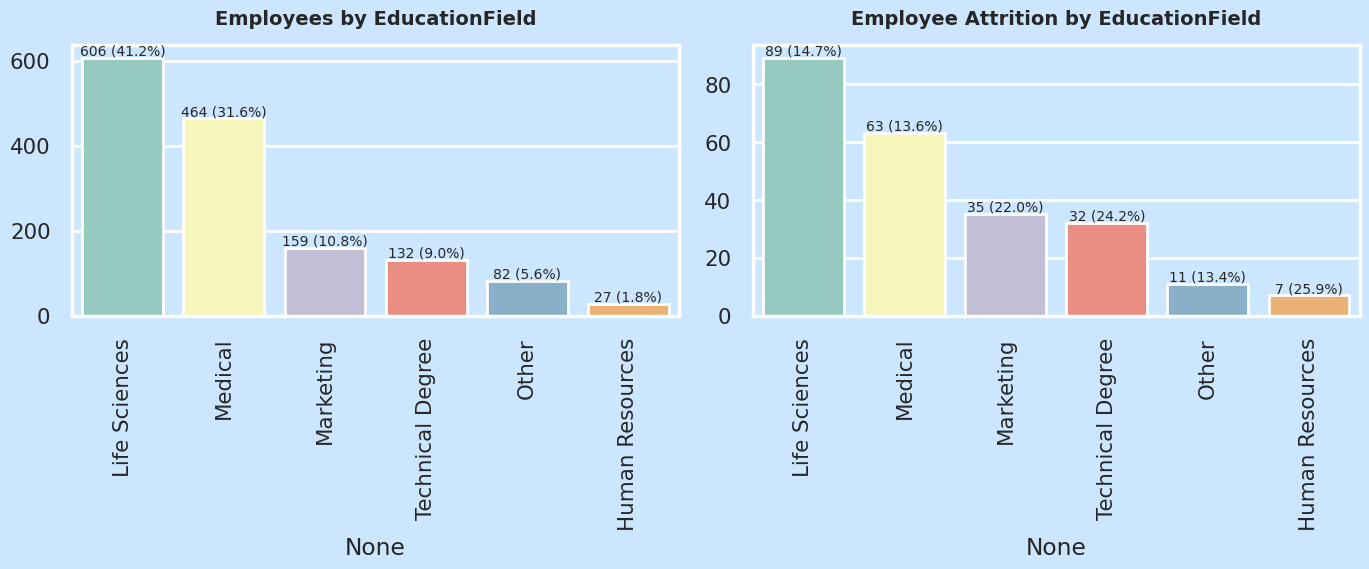

In [ ]:
#Attrition byEducationField
count_percent_plot(dataset, 'EducationField', 'Attrition')

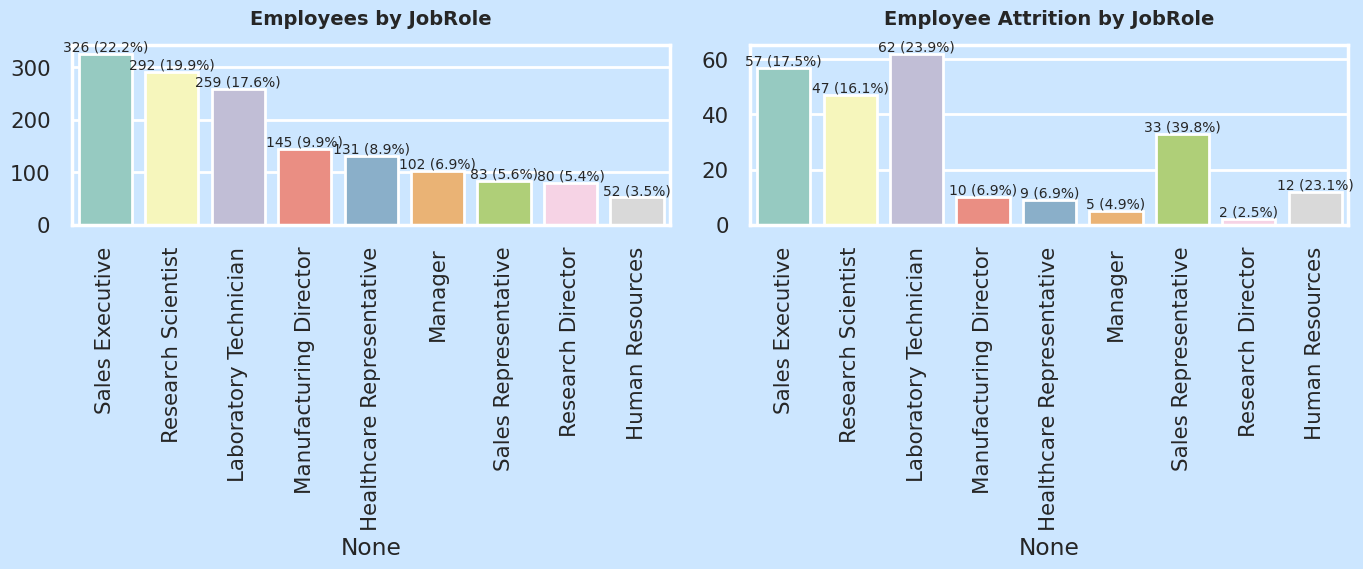

In [ ]:
#Attrition by JobRole
count_percent_plot(dataset, 'JobRole', 'Attrition')

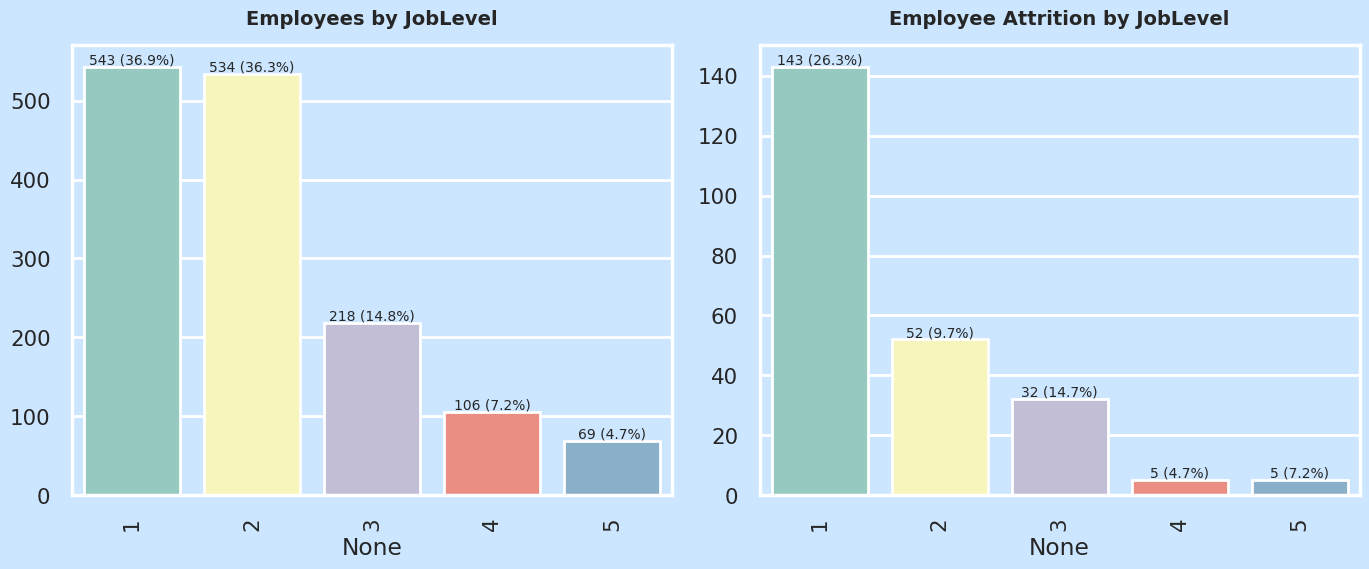

In [ ]:
#Attrition by JobLevel
count_percent_plot(dataset, 'JobLevel', 'Attrition')

**FEATURE IMPORTANCE**

In [ ]:
#ANOVA test for analysing the importance of numerical features
num_features = dataset.select_dtypes(np.number).columns

dataset_copy = dataset.copy()
dataset_copy["Attrition"] = dataset_copy["Attrition"].replace({"No":0,"Yes":1})

f_scores = {}
p_values = {}

for column in num_features:
    f_score, p_value = stats.f_oneway(dataset_copy[column],dataset_copy["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

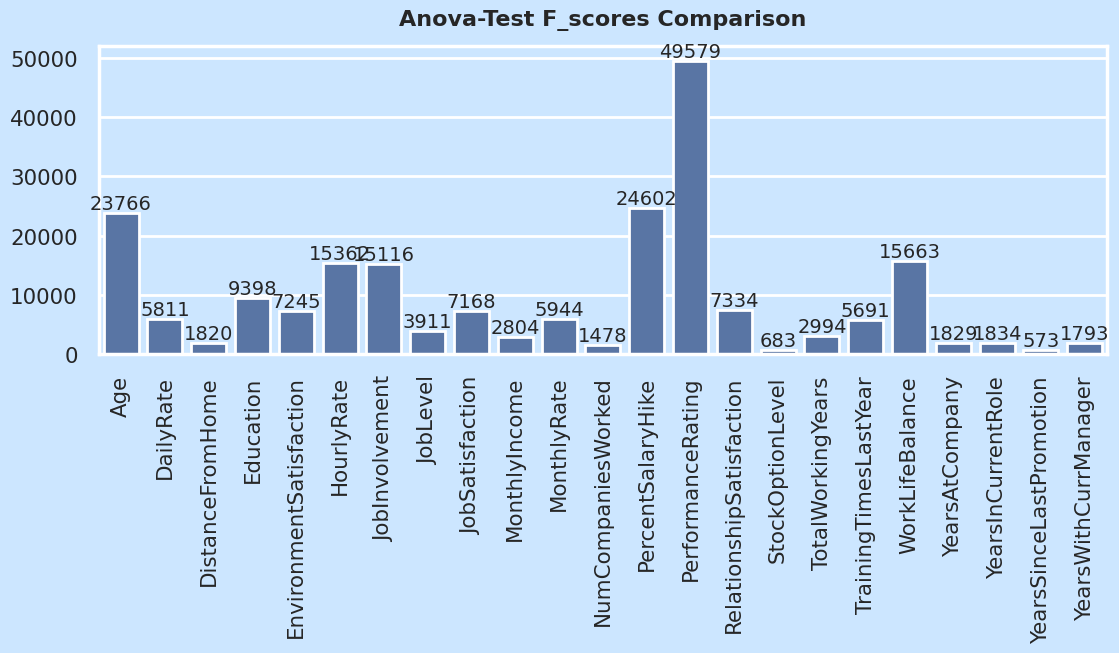

In [ ]:
#Plot a visualization for the ANOVA test results
plt.figure(figsize=(13,4))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [ ]:
#CHI test for analysing the importance of categorical features
cat_features = dataset.select_dtypes(include="object").columns.tolist()
cat_features.remove("Attrition")

chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_features:
    contingency_table = pd.crosstab(dataset[col], dataset['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value



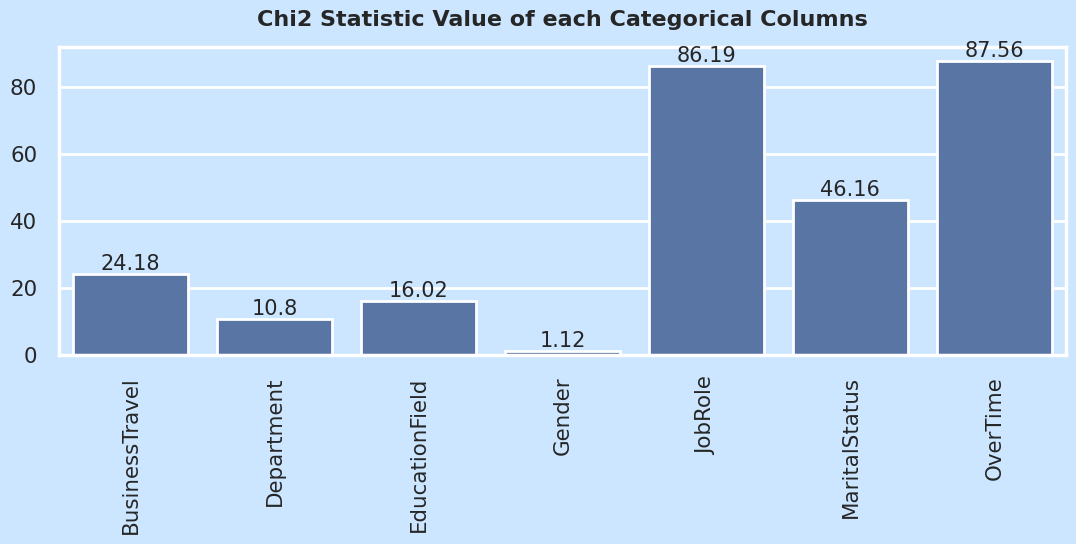

In [ ]:
#Plot a visualization for the CHI test results
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(13,4))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [ ]:
#Compairison of Chi2_Statistic and P_value of Chi_Square Test.
chi_dataset = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_dataset["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_dataset

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,EducationField,16.024674,0.00677398013902521211
3,Gender,1.116967,0.29057244902890855265
4,JobRole,86.190254,0.00000000000000275248
5,MaritalStatus,46.163677,0.00000000009455511060
6,OverTime,87.564294,0.00000000000000000001


**FEATURE ENCODING**

In [ ]:
#select categorical features for encoding
cat_features = dataset.select_dtypes(include=['object']).columns.tolist()
cat_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
#encode Gender
dataset["Gender"] = dataset["Gender"].replace({"Female":0 ,"Male":1})

In [ ]:
#Encode the remaining categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset["Attrition"] = le.fit_transform(dataset['Attrition'])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded = encoder.fit_transform(dataset[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

encoded_dataset = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

dataset = pd.concat([dataset,encoded_dataset],axis=1)

dataset = dataset.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

**CORRELATION MATRIX**

<Axes: title={'center': 'Correlation Plot'}>

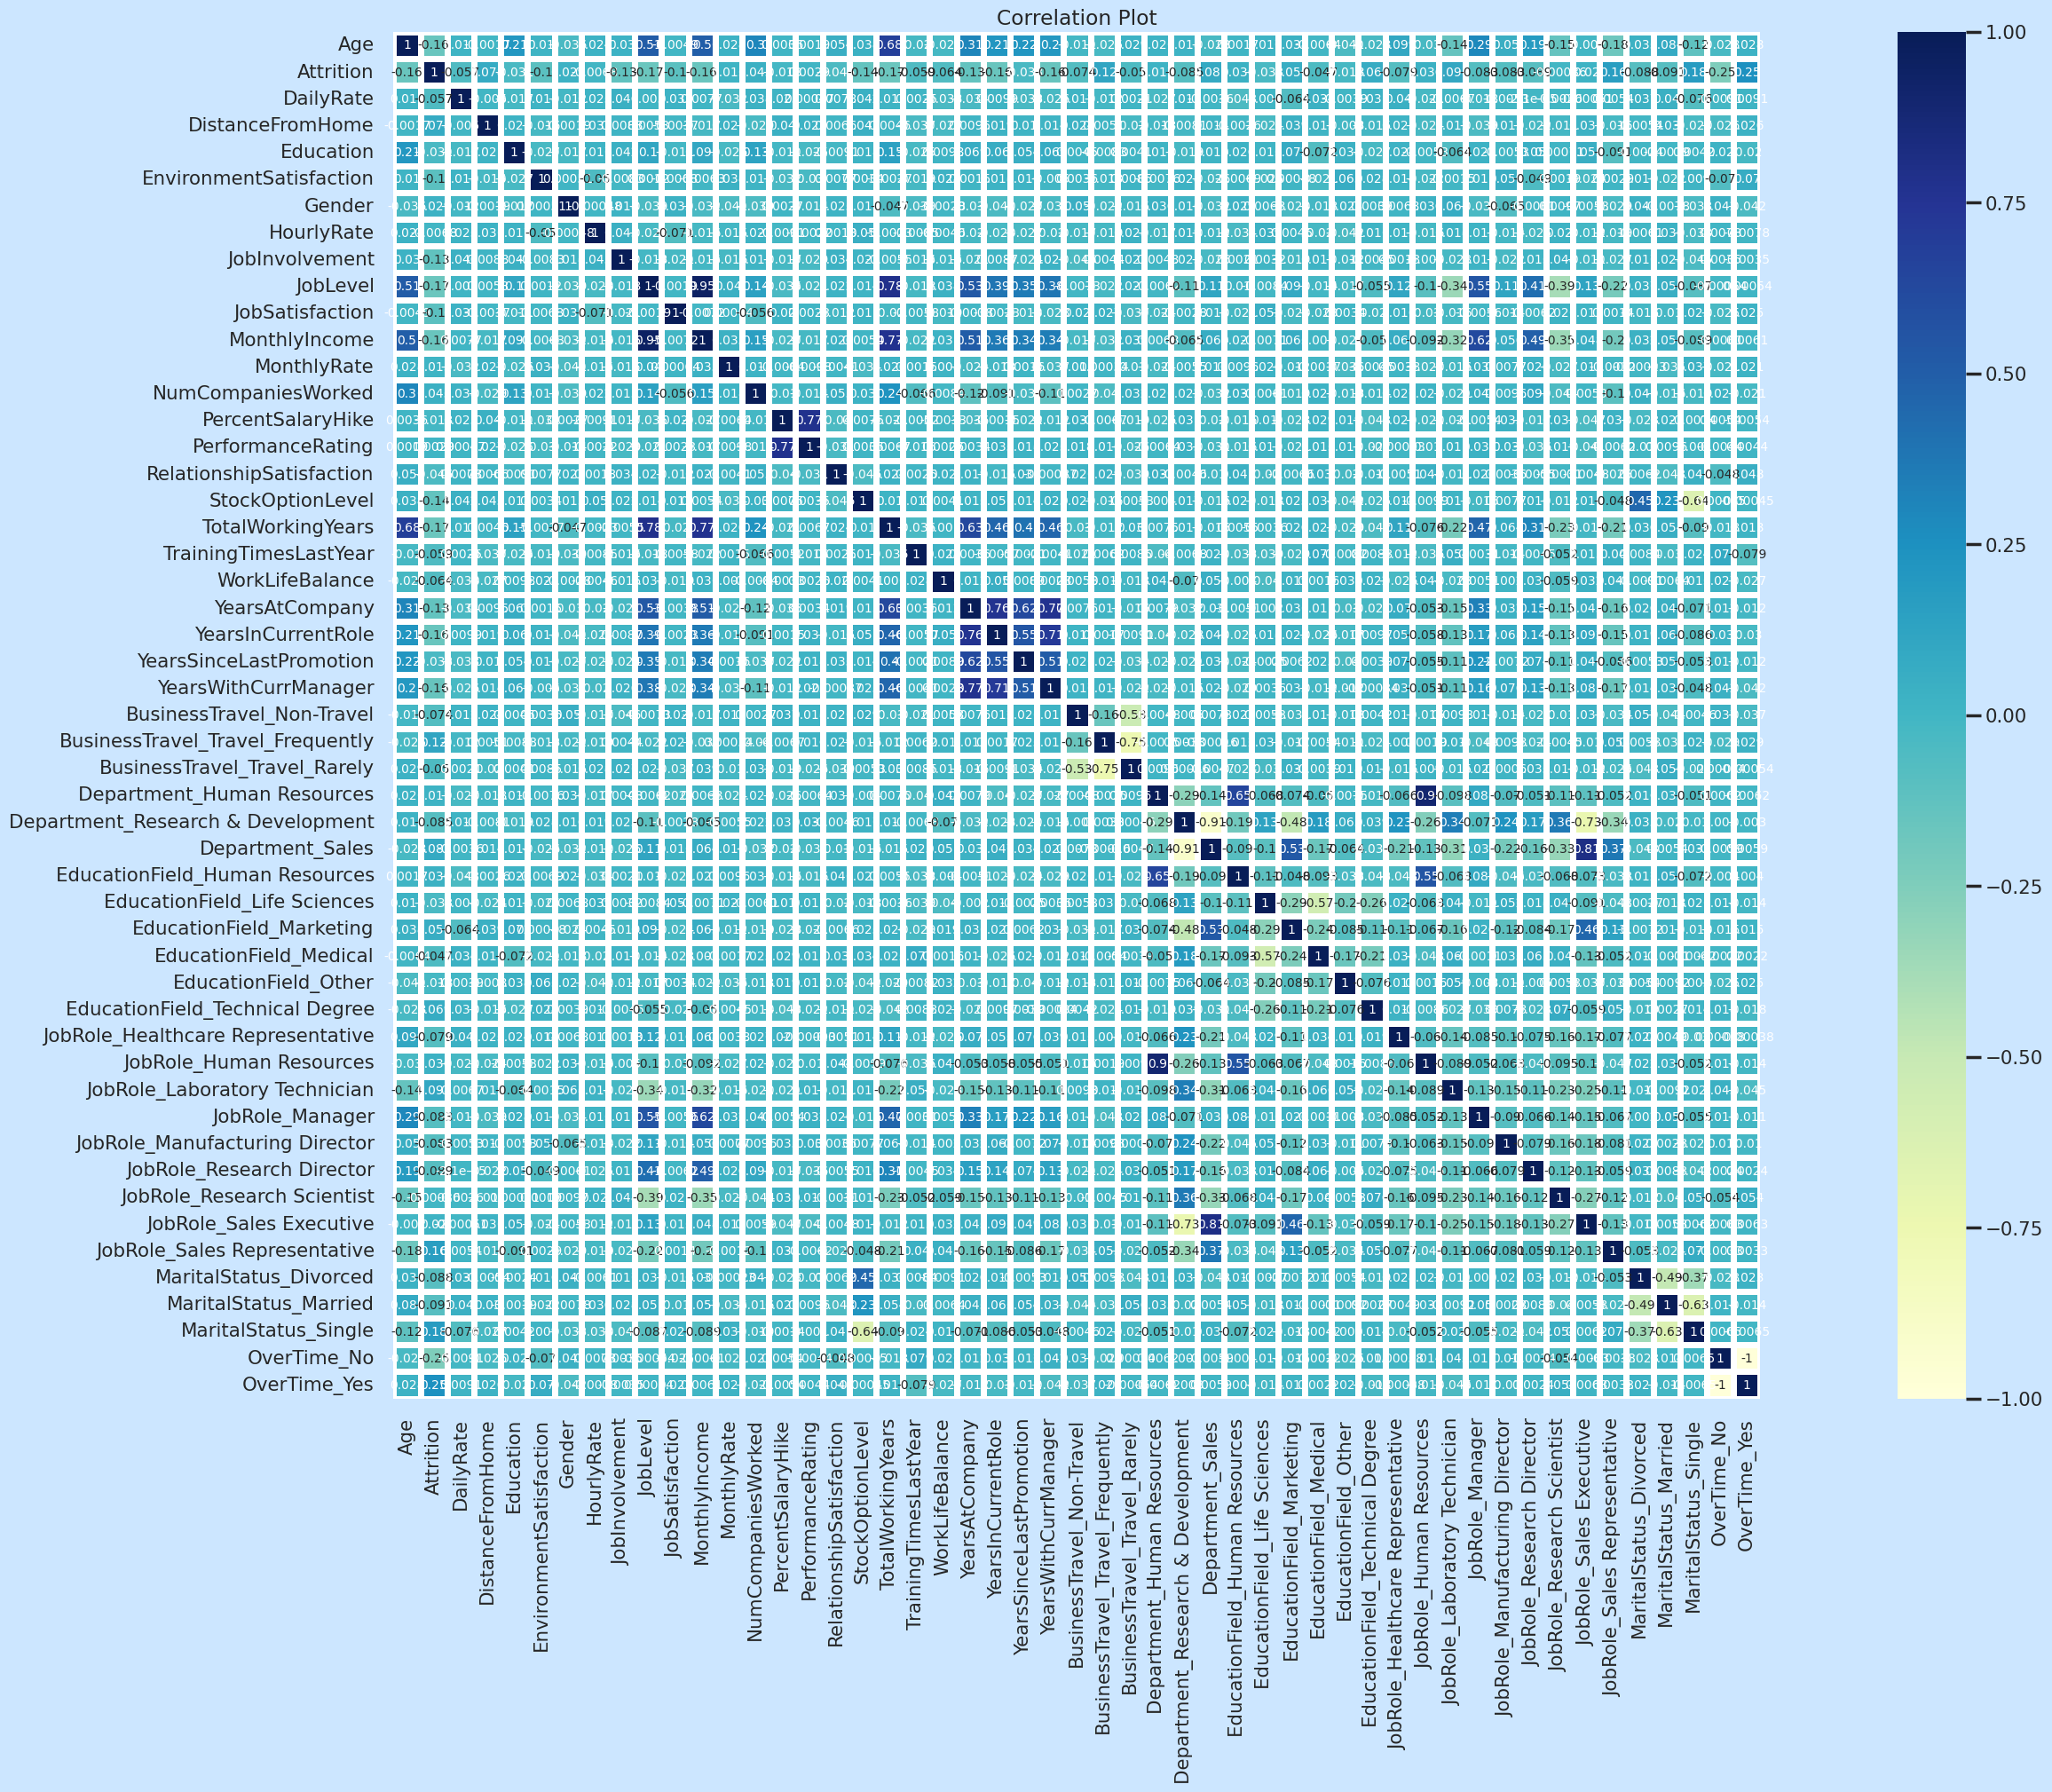

In [ ]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(dataset.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [ ]:
# drop highly correlated features

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
dataset.drop(columns=cols, inplace=True)

**DATA SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
x = dataset.drop(['Attrition'], axis=1)
y = dataset[['Attrition']]

In [ ]:
#balance the data using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
dtype: int64

After Smoote Attrition
0            1233
1            1233
dtype: int64


In [ ]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_smote)

**SPLIT THE DATA INTO TRAINING AND TEST**

In [ ]:
#Split the Data into UnScaled Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

#Split the Data into Scaled Training and Test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [ ]:
#importing machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os
from sklearn.base import ClassifierMixin

#for hypertuning
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

In [ ]:
#Building a baseline for the model
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

In [ ]:
#function for model building with scaled data
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)


    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

**LOGISTIC REGRESSION MODEL**


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 86.05476673427992
Accuracy_Score of LogisticRegression() model on Testing Data is: 84.81781376518218
Precision Score of LogisticRegression() model is: 0.8393574297188755
Recall Score of LogisticRegression() model is: 0.8565573770491803
ROC_AUC Score of LogisticRegression() model is: 0.9290819672131149
f1 Score of LogisticRegression() model is: 0.8478701825557808
kappa Score of LogisticRegression() model is: 0.6963861345570761
G_mean Score of LogisticRegression() model is: 0.8482786885245901

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       250
           1       0.84      0.86      0.85       244

    accuracy                           0.85       494
   macro avg    

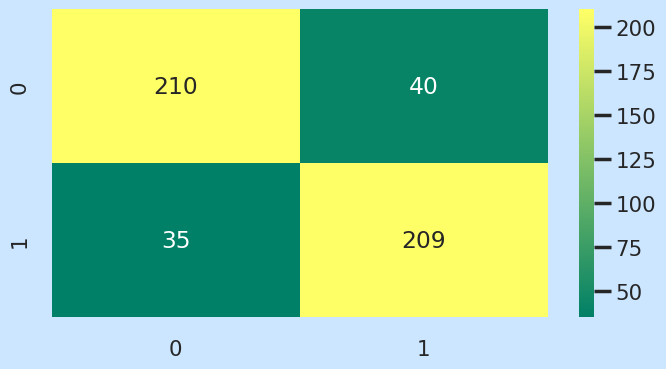


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


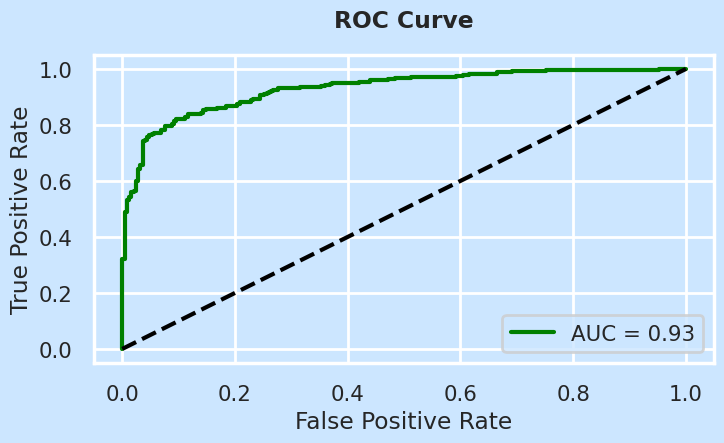

In [ ]:
model_prediction(LogisticRegression())

**NAIVE BAYES**


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 75.25354969574036
Accuracy_Score of GaussianNB() model on Testing Data is: 75.7085020242915
Precision Score of GaussianNB() model is: 0.697452229299363
Recall Score of GaussianNB() model is: 0.8975409836065574
ROC_AUC Score of GaussianNB() model is: 0.876016393442623
f1 Score of GaussianNB() model is: 0.7849462365591398
kappa Score of GaussianNB() model is: 0.5157653978108152
G_mean Score of GaussianNB() model is: 0.7587704918032787

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       250
           1       0.70      0.90      0.78       244

    accuracy                           0.76       494
   macro avg       0.78      0.76      0.75       494
weighted avg       0.78      0.76    

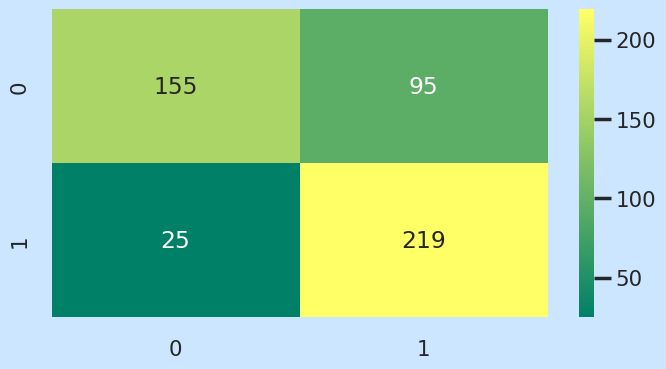


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


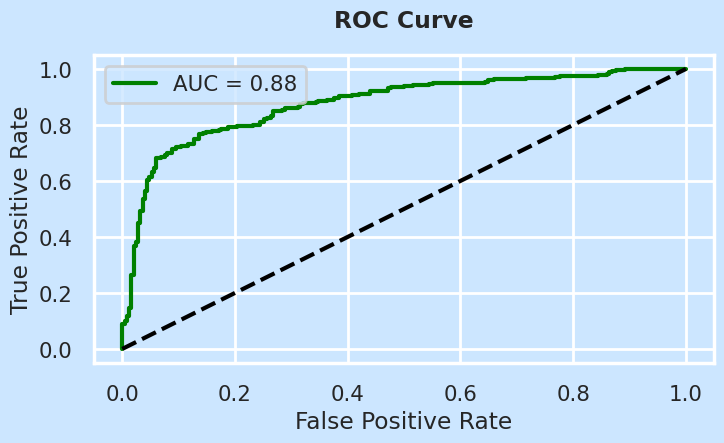

In [ ]:
model_prediction(GaussianNB())

In [ ]:
#function for model building with unscaled data
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)

    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()


**DECISION TREE**


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 85.02024291497976
Precision Score of DecisionTreeClassifier() model is: 0.8195488721804511
Recall Score of DecisionTreeClassifier() model is: 0.8934426229508197
AUC Score of DecisionTreeClassifier() model is: 0.8507213114754099

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       250
           1       0.82      0.89      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494


------------------------------------------------------------------------
Confusion Matrix o

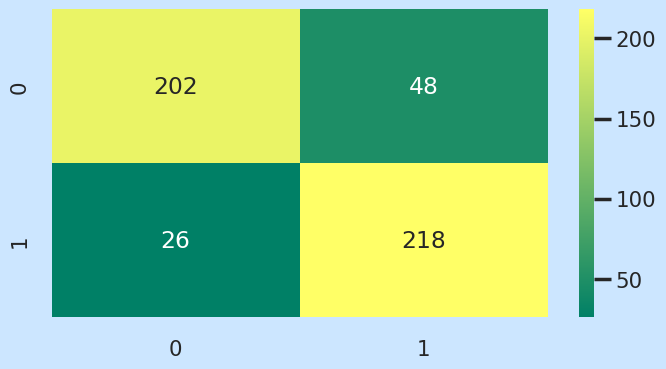


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


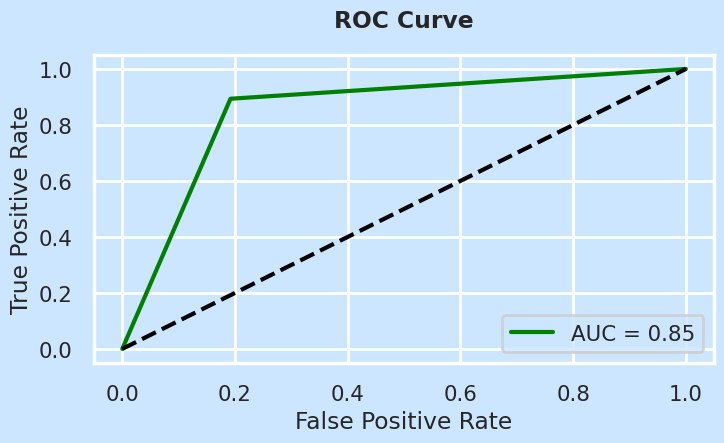

In [ ]:
model_prediction(DecisionTreeClassifier())

**RANDOM FOREST**


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 93.31983805668015
Precision Score of RandomForestClassifier() model is: 0.9773755656108597
Recall Score of RandomForestClassifier() model is: 0.8852459016393442
AUC Score of RandomForestClassifier() model is: 0.9734508196721312

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       250
           1       0.98      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix o

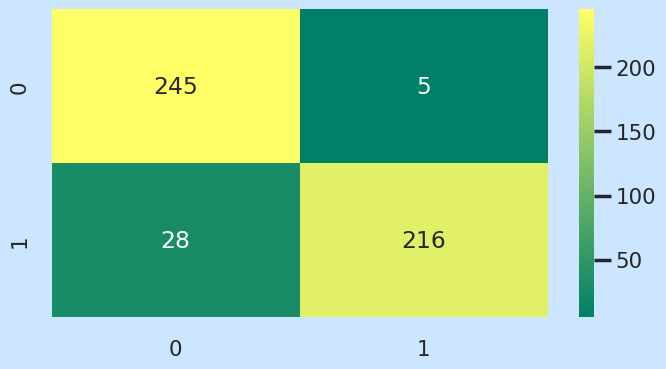


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


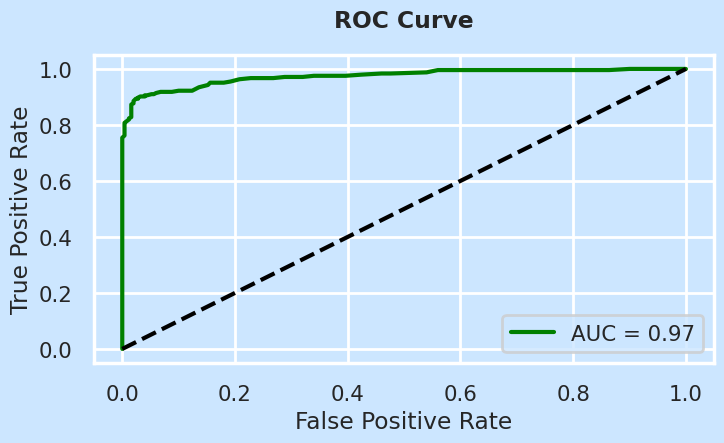

In [ ]:
model_prediction(RandomForestClassifier())

**XG BOOST**


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

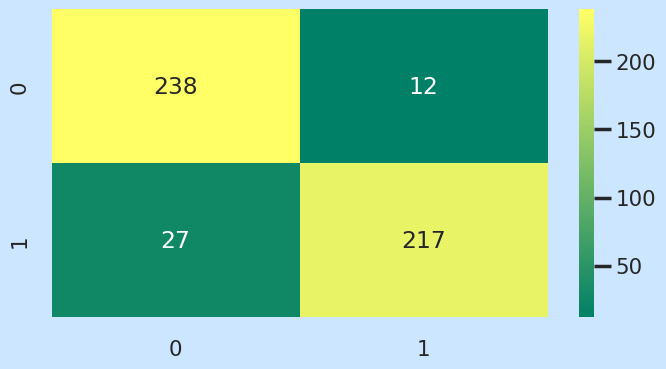


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


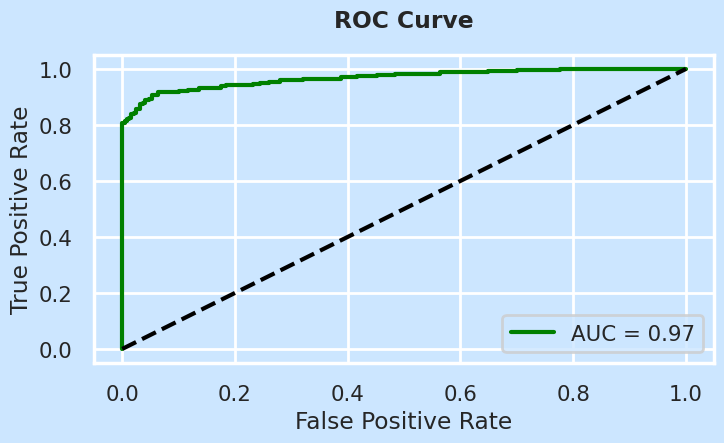

In [ ]:
model_prediction(XGBClassifier())

In [ ]:
models = ["Logistic Regression","Naive Bayes","Naive Bayes1","Decision Tree","Random Forest","XGBoost"]
dataset = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})

# create a Boolean mask for the rows to remove
mask = dataset['Algorithms'] == 'Naive Bayes1'

# select all rows except the ones that contain 'Coca Cola'
dataset = dataset[~mask]

dataset

,Algorithms,Training Score,Testing Score,Precision,Recall,ROC_AUC Score,f1_Score,Kappa_Score,G_Mean
0,Logistic Regression,86.054767,84.817814,0.839357,0.856557,0.929082,0.847870,0.696386,0.848279
1,Naive Bayes,75.253550,75.708502,0.697452,0.897541,0.876016,0.784946,0.515765,0.758770
3,Decision Tree,100.000000,85.020243,0.819549,0.893443,0.850721,0.854902,0.700685,0.850721
4,Random Forest,100.000000,93.319838,0.977376,0.885246,0.973451,0.929032,0.866226,0.932623
5,XGBoost,100.000000,92.105263,0.947598,0.889344,0.967607,0.917548,0.841965,0.920672


Based on the data in the table above, XGBoost has demostrated that it is the most balanced and generalizable model amongst the tested and trained models.